In [1]:
import sys
import pandas as pd
sys.path.insert(0, '../src/data')
sys.path.insert(0, '../src/features')
sys.path.insert(0, '../src/models')
sys.path.insert(0, '../src/visualization')

from data_manager import DataManager
from pretreatment import create_superclasses

from ada_boost import AdaBoost
from decision_tree import DecisionTree
from k_means import KMeans
from svm import Svm
from neural_network import NeuralNetwork
from perceptron import Perceptron

from visualize import Visualize

## Prétraitement des données

In [2]:
raw_path = '../data/raw/train.csv'
test_path = '../data/raw/test.csv'
superclasses_path = '../data/processed/superclasses.csv'

### Superclasses

In [3]:
# create_superclasses(raw_path, superclasses_path)

## Chargement des données

In [4]:
data_path = raw_path
# data_path = superclasses_path

In [5]:
dataManager = DataManager(data_path=data_path, test_path=test_path)

constants, x_train, x_test, t_train, t_test = dataManager.load_data()
# constants.print()
t_train_onehot = dataManager.one_hot_encoding(t_train)
t_test_onehot = dataManager.one_hot_encoding(t_test)

print(f"x_train.shape: {x_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print(f"t_train.shape: {t_train.shape}")
print(f"t_test.shape: {t_test.shape}")


x_train.shape: (792, 192)
x_test.shape: (198, 192)
t_train.shape: (792,)
t_test.shape: (198,)


## Préparation du modèle

### Perceptron

In [6]:
model = Perceptron(constants)
hyperparameters_choices = {
	"alpha": [0.1, 0.2, 0.01],
	"max_iter": [100, 200, 300],
}

### Réseau de neurones

In [6]:
model = NeuralNetwork(constants)
# hyperparameters_choices = {
# 	"alpha": [1e-5],
# 	"max_iter": [300],
# 	"batch_size": [32, "auto"],
# 	"hidden_layer_sizes" : [(100,1), (75, 2), (50, 3)]
# }
hyperparameters_choices = {
	"alpha": [1e-4],
	"max_iter": [500],
	"batch_size": ["auto"],
	"hidden_layer_sizes" : [(100,)]
}

### Adaboost

In [ ]:
model = AdaBoost(constants)
hyperparameters_choices = {
	# TODO: add hyperparameters
}

### SVM

In [22]:
model = Svm(constants)
hyperparameters_choices = {		# SVM doesn't have hyperparameters in the traditional sense, but we can optimize C (regularization parameter)
	"C": [1, 10, 100, 1000]
}

### Arbre de décision

In [30]:
model = DecisionTree(constants)
hyperparameters_choices = {
	# TODO: add hyperparameters
}

### K-means

In [8]:
model = KMeans(constants)
hyperparameters_choices = {		# KMeans doesn't have hyperparameters like SVM, but we can optimize the number of clusters (k)
	'n_clusters': [2, 3, 4, 5],
	'n_init': ["auto", 10]
}

## Apprentissage du modèle

In [7]:
hyperparameters = model.get_alea_hyperparameters(x_train, t_train, hyperparameters_choices)
print(hyperparameters)

{'n_clusters': 2}


In [7]:
hyperparameters = model.find_optimal_hyperparameters(x_train, t_train, hyperparameters_choices)
print(f"hyperparameters: {hyperparameters}")

/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/timwhity/D

hyperparameters: {'alpha': 0.0001, 'batch_size': 'auto', 'hidden_layer_sizes': (100,), 'max_iter': 500}


/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [8]:
model.train(x_train, t_train, hyperparameters)

/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Tests et visualisation

In [9]:
print(model.model.score(x_train, t_train))

0.9962121212121212


In [10]:
t_pred = model.predict(x_test)

In [11]:
visualize = Visualize(constants, t_pred, t_test)

In [16]:
# visualize.print_labels_scores()
visualize.print_mean_scores()

Accuracy       = 0.929
Mean precision = 0.824
Mean recall    = 0.874
Mean F1 score  = 0.835


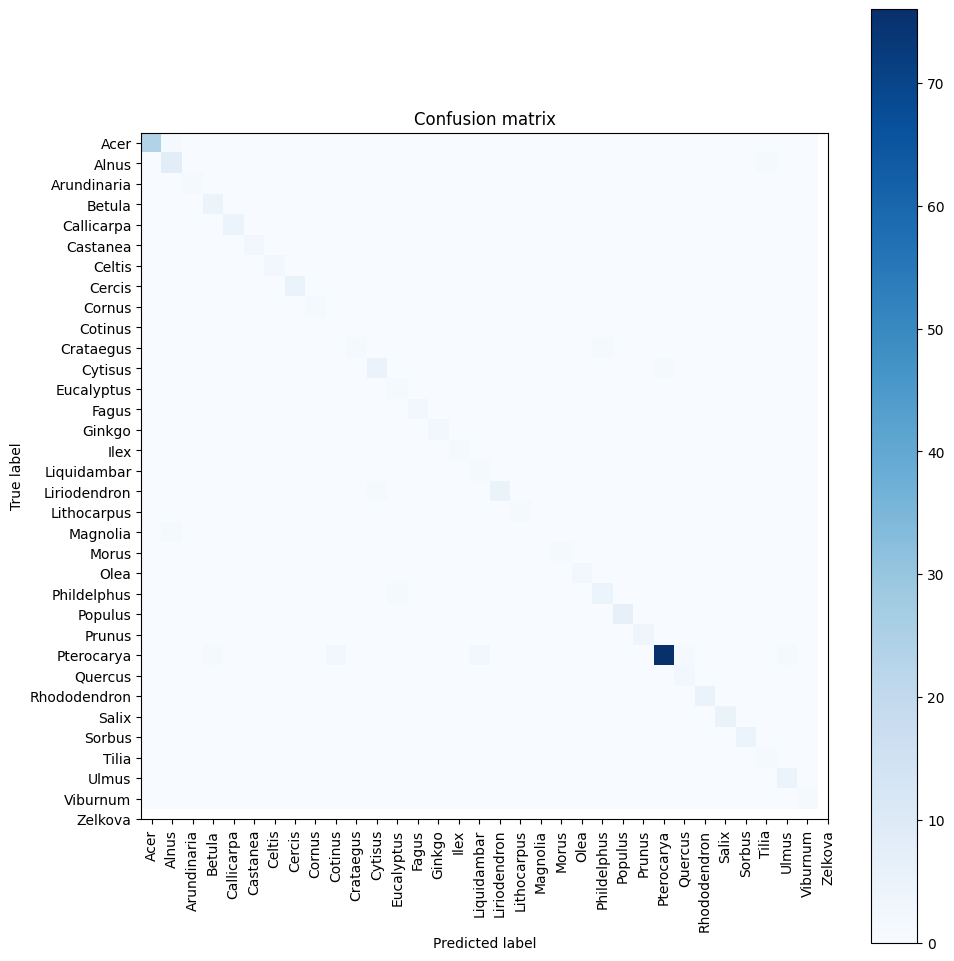

In [14]:
visualize.plot_confusion_matrix(show_label=False)
# visualize.plot_confusion_matrix(show_label=True)

## Enregistrement des output des données de test

You must submit a csv file with the image id, all candidate species names, and a probability for each species. The order of the rows does not matter. The file must have a header and should look like the following:

```
id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,...
2,0.1,0.5,0,0.2,...
5,0,0.3,0,0.4,...
6,0,0,0,0.7,...
etc.
```

In [17]:
assert data_path == raw_path		# Check that we are using the raw data and not the superclasses

# Load the test data
_, x_test = dataManager.load_test_data()

# Predict the labels for the test data
t_pred = model.predict(x_test)

# Save the predictions to a csv file
dataManager.save_predictions(t_pred, '../data/predictions/predictions.csv')

NameError: name 'data_path' is not defined